In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'../dataset/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
dataset = dataset.drop(columns=['User ID', 'Gender'])
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

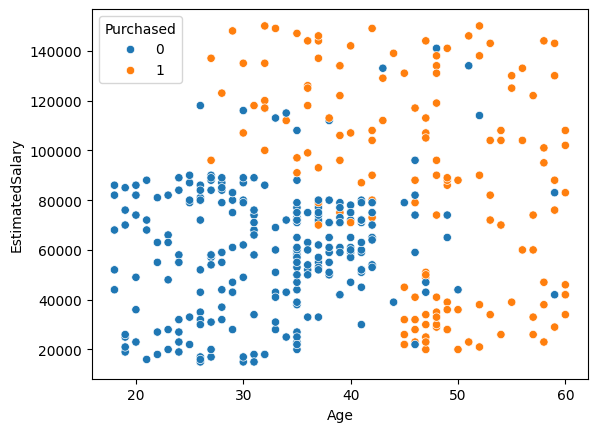

In [5]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=dataset)
plt.show()

In [6]:
x = dataset.iloc[:, :-1]
y = dataset['Purchased']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Pre Pruning

In [10]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [11]:
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(93.33333333333333, 91.0)

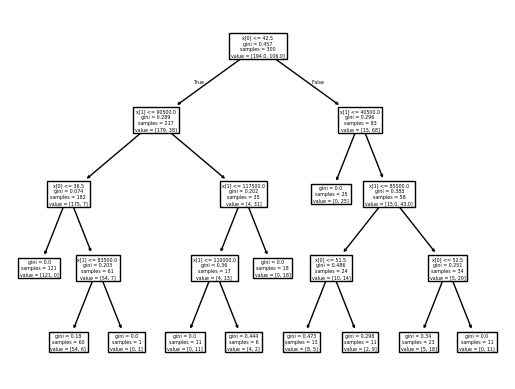

In [12]:
plot_tree(dt)
plt.show()

In [13]:
from mlxtend.plotting import plot_decision_regions

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


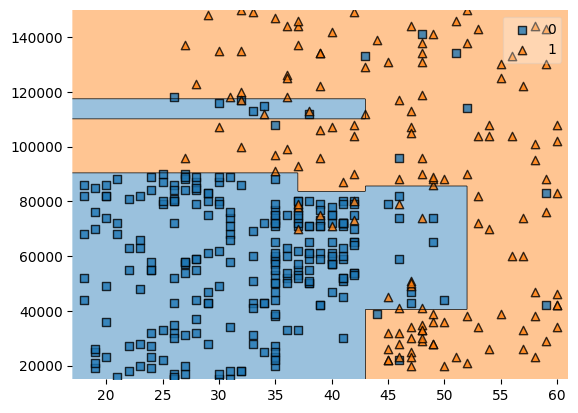

In [14]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt)
plt.show()

In [15]:
# Post Pruning

In [16]:
for i in range (1,20) :
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train, y_train)
    print("Max Depth: " + str(i) + " train score: " + str(dt.score(x_train, y_train)*100) + " test score: " +  str(dt.score(x_test, y_test)*100))

Max Depth: 1 train score: 82.33333333333334 test score: 89.0
Max Depth: 2 train score: 91.33333333333333 test score: 92.0
Max Depth: 3 train score: 91.33333333333333 test score: 92.0
Max Depth: 4 train score: 93.33333333333333 test score: 91.0
Max Depth: 5 train score: 93.33333333333333 test score: 89.0
Max Depth: 6 train score: 95.33333333333334 test score: 90.0
Max Depth: 7 train score: 97.0 test score: 85.0
Max Depth: 8 train score: 97.33333333333334 test score: 87.0
Max Depth: 9 train score: 98.66666666666667 test score: 87.0
Max Depth: 10 train score: 99.0 test score: 83.0
Max Depth: 11 train score: 99.0 test score: 84.0
Max Depth: 12 train score: 99.0 test score: 85.0
Max Depth: 13 train score: 99.33333333333333 test score: 85.0
Max Depth: 14 train score: 99.66666666666667 test score: 86.0
Max Depth: 15 train score: 99.66666666666667 test score: 85.0
Max Depth: 16 train score: 99.66666666666667 test score: 85.0
Max Depth: 17 train score: 99.66666666666667 test score: 84.0
Max Dep

In [17]:
po_dt = DecisionTreeClassifier(max_depth=2)
po_dt.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=2)

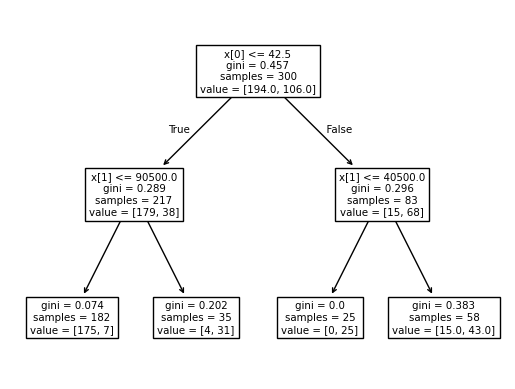

In [18]:
plot_tree(po_dt)
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


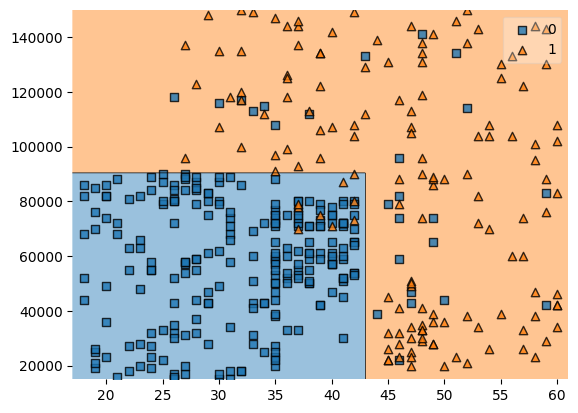

In [19]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=po_dt)
plt.show()